In [5]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

tweets.csv


In [6]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [7]:
# example code to read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
tweets_df.take(5)

[Row(target='4', id='1467822272', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='ersle', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', id='1467822273', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='becca210', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', id='1467822283', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='Wingman29', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', id='1467822287', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='katarinka', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', id='1467822293', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='_EmilyYoung', text='@LovesBrooklyn2 he has that effect on everyone ')]

What problems did you have with colab? Your comments here:
    
I do not have major problem with colab and I have a great experience using this platform. However, one concern that I have is that if we train/test model with heavy weight operations (Ex: Large data set), I am worry that the datafile recycling on Google Colab might have a negative impact with the model training and testing. 

In [9]:
# Do not delete or change this cell

enable_grid = True

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Sentiment Analysis
In this assignment, you will use the tweets.csv file to perform sentiment analysis. The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

# Qustion 1: (10 pts)
Read tweets.csv into a spark dataframe named `tweets_df`.  Solutions that do not use `get_training_filename` will be heavily penalized.  Drop all columns except target and text.  Transform the target column such that a negative sentiment is equal to 0 and a positive sentiment is equal to 1.  Determine and print the percentage of positive and negative tweets in the dataframe such that it's easy for the graders to find and interpret your data.

In [11]:
# your code here
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import pyspark.sql.functions as fn 
from pyspark.sql.functions import col, when, size
import os

tweets_df = spark.read.format("csv").option("header", "true").load(get_training_filename("tweets.csv"))
drop_col = ['id','date','flag','user']
tweets_df = tweets_df.drop(*drop_col)
tweets_df = tweets_df.withColumn("target", when(col("target") == 0, 0)
                                 .when(col("target") == 4, 1))
tot = tweets_df.count()
percent = tweets_df.groupBy('target').count().withColumnRenamed('count',"Count based on polarity").withColumn("Polarity percentage", fn.col("Count based on polarity")/tot *100)
percent.show()


+------+-----------------------+-------------------+
|target|Count based on polarity|Polarity percentage|
+------+-----------------------+-------------------+
|     1|                  50000|               50.0|
|     0|                  50000|               50.0|
+------+-----------------------+-------------------+



In [12]:
# grading cell do not modify
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


(100000, 2)


# Question 2: (10 pts)
Pre-process the data by creating a pipeline named `tweets_pre_proc_pipe`. Your pipeline should tokenize, remove stop words, and do a TF-IDF transformation.  Fit and execute your pipeline, and create a new dataframe named `tweets_pre_proc_df`.  Print the shape of the resulting TF-IDF data such that it's easy for the graders to find and understand as num rows x num words. Based on the shape of the TF-IDF data, would you expect a logistic regression model to overfit?

In [14]:
# your code here
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import IDF
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import RegexTokenizer
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

#tokenizer = RegexTokenizer(minTokenLength=2).setInputCol('text').setOutputCol('words').setGaps(False).setPattern("\\p{L}+")
#tokenizer = RegexTokenizer().setInputCol('text').setOutputCol('words')
tokenizer = Tokenizer(inputCol="text", outputCol="words")
#remover = StopWordsRemover(inputCol='words', outputCol='words_clean')

remover = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("words_clean")

cv = CountVectorizer(minTF =1, minDF = 5, vocabSize = 2**17, inputCol='words_clean', outputCol="tf")
idf = IDF(inputCol="tf", outputCol="tfidf")

# Pre-processing pipeline
tweets_pre_proc_pipe = Pipeline(stages=[tokenizer,remover,cv,idf])

# fit the model with tweets_df
model = tweets_pre_proc_pipe.fit(tweets_df)
tweets_pre_proc_df = model.transform(tweets_df)


num_row = tweets_pre_proc_df.select('tf').count()
#test = tweets_pre_proc_df.withColumn("word_count", size("words_clean"))
#num_word = test.groupBy().sum("word_count").collect()[0][0]
num_word = len(model.stages[-2].vocabulary)
print('(num row x num word) :', (num_row,  num_word))


(num row x num word) : (100000, 13693)


In [15]:
# grading cell do not modify
display(tweets_pre_proc_df.toPandas().head())


,target,text,words,words_clean,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, @health4uandpets, u, guys, r, the, b...","[love, @health4uandpets, u, guys, r, best!!]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight!, wait!!, , -, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 3.183..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[@darealsunisakim, thanks, for, the, twitter, ...","[@darealsunisakim, thanks, twitter, add,, suni...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[@lovesbrooklyn2, he, has, that, effect, on, e...","[@lovesbrooklyn2, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Your explanation here: 

Based on the shape of the TF-IDF data, I think the logistic regression model will be overfitted because we have a significantly larger number of features than the number of data within the dataset. And this number of data is prior to spliting into training, validation and testing set,too.

# Question 3: (10 pts)
Since IDF considers a word's frequency across all documents in a corpus, you can use IDF as a form of inference.  Examine the documentation for the spark ML object that you used to create TF-IDF scores and learn how to extract the IDF scores for words in the corpus.  Create a pandas dataframe containing the 5 most important IDF scores named `most_imp_idf`.  Create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.  Each dataframe shall have 2 columns named `word` and `idf_score`.  Explain in words your interpretation of what the IDF scores mean.

In [18]:
# your code here
# NEED TO COME BACK HERE

import pandas as pd


# Extract words and idf score
word = model.stages[-2].vocabulary
#print(len(word))
idf = model.stages[-1].idf
# Create panda dataframe
word_idf_pd = pd.DataFrame({'word': word, 'idf_score': idf })
max_value = word_idf_pd['idf_score'].max()
most_imp_idf = word_idf_pd[word_idf_pd['idf_score']== max_value]
#most_imp_idf = word_idf_pd.sort_values('idf_score', ascending=False).head(5)
least_imp_idf = word_idf_pd.sort_values('idf_score', ascending=True).head(5)




In [19]:
# grading cell do not modify
display(most_imp_idf)
display(least_imp_idf)

,word,idf_score
7853,tsk,9.721176
8196,but..,9.721176
9121,thks,9.721176
9164,(8),9.721176
9185,"broke,",9.721176
...,...,...
13688,suckss,9.721176
13689,prada,9.721176
13690,universe!,9.721176
13691,playin',9.721176


,word,idf_score
0,,1.126528
1,just,2.588812
2,i'm,2.645649
3,good,3.015945
4,like,3.113850


Your explanation here: 

IDF scores represent the inverse document frequency for words in the corpus. 
I married the vocabularies that were treated as input data for tf-idf process with each of its idf score.
Therefore, for the most_imp_idf dataframe, the words that are most frequently shown will be penalized with lower scores. 
For the least_imp_idf dataframe, the words that are least frequently shown will have higher scores. 

# Question 4: (10 pts)
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Fit lr_pipe using `tweets_df`.  Score the model using ROC AUC.  Report the resulting AUC such that it is easy for graders to find and interpret.

In [21]:
# your code here
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

training, validation, test = tweets_df.randomSplit([0.6, 0.3, 0.1], 0)

lr = LogisticRegression(labelCol = 'target',featuresCol='tfidf')

#Create pipeline
lr_pipe = Pipeline(stages=[tweets_pre_proc_pipe, lr])
# Fit Model with training
lr_model = lr_pipe.fit(training)

# Compute raw scores on the test set
prediction = lr_model.transform(test)

evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol="prediction")
evaluation = evaluator.evaluate(prediction)
print("evaluation (area under ROC): %f" % evaluation)





evaluation (area under ROC): 0.720101


# Question 5: (10 pts)
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively. Analyze the 2 dataframes and describe if the words make sense.  Do the words look like they are really negative and positive?

In [22]:
# your code here

import pandas as pd

word = lr_model.stages[0].stages[-2].vocabulary
weights = lr_model.stages[-1].coefficients.toArray()
print('length of word:', len(word))
print('length of weights:', len(weights))
word_weights_df = pd.DataFrame({'word': word, 'score': weights})
word_weights_df.head()

lr_pipe_df_neg = word_weights_df.sort_values('score').head(10)
lr_pipe_df_pos = word_weights_df.sort_values('score', ascending=False).head(10)

length of word: 9240
length of weights: 9240


In [23]:
# grading cell - do not modify
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,score
7868,grr.,-4.248248
8897,stupidly,-3.792250
8824,tidying,-3.498210
8539,round.,-3.359560
7838,gutted!,-3.198066
8753,"internet,",-3.147051
2104,depressed,-2.975052
8084,unlucky,-2.971917
4772,noo,-2.943008
5549,news:,-2.762037


,word,score
5268,thx!,3.886612
8749,andrew,3.775713
8870,"tweeps,",3.590758
4180,here:,3.527108
8141,sane,2.959482
5785,smile.,2.812721
8827,stones,2.691826
2210,thankyou,2.667729
3005,tip,2.623902
5335,peaceful,2.606344


Your explanation here: 

Looking into both dataframes, I am seeing a lot of model noises from both dataframes. The data does not display positive or negative sentiment and this is due to model overfitting.

# Question 6a: (5 pts)
The goal of this question is to try to improve the score from question 4 using a regularization grid search on a new pipeline named `lr_pipe_1`. lr_pipe_1 is the same as lr_pipe above but we would like you to create a new pipe for grading purposes only.  I'm not sure if it's possible to increase the score or not.  You will be graded on level of effort to increase the score in relation to other students in the class.  All of your grid search code should be inside the `if enable_grid` statement in the cell below.  The enable_grid boolean is set to true in a grading cell above.  If any of the grid search code executes outside of the if statement, you will not get full credit for the question.  We want the ability to turn off the grid search during grading.<br>

In [24]:
# your grid search (and only your grid search) code here
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

lr_6a = LogisticRegression().\
        setLabelCol('target').\
        setFeaturesCol('tfidf').\
        setRegParam(0.0).\
        setMaxIter(100).\
        setElasticNetParam(0.)


#lr_6a = LogisticRegression(labelCol = 'target',featuresCol='tfidf', maxIter=10, regParam=0.3, elasticNetParam=0.8)

if enable_grid:
    # your grid search code here
    #paramGrid = ParamGridBuilder().build()
    grid = ParamGridBuilder().\
    addGrid(lr_6a.regParam, [0., 0.01, 0.02]).\
    addGrid(lr_6a.elasticNetParam, [0., 0.2, 0.3]).\
    build()
    
    evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol="prediction")
    lr_pipe_1 = Pipeline(stages=[tweets_pre_proc_pipe, lr_6a])
    cv_6a = CrossValidator(estimator=lr_pipe_1, evaluator=evaluator, estimatorParamMaps=grid, numFolds=3)
    model_6a =cv_6a.fit(training)
    prediction_6a = model_6a.transform(test)
    pass

# new_pred = new_prediction.toPandas()
# new_pred.head()

print('AUC score from new cv model:{:4f}'.format(evaluator.evaluate(prediction_6a)))


AUC score from new cv model:0.745523


# Question 6b (5 pts)
Build a new pipeline named `lr_pipe_2` which uses the optimized model parameters from the grid search in question 6a above (the best model).  Create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Fit and transform lr_pipe_2.  Compare AUC scores between lr_pipe_2 with lr_pipe in question 4.  Create a pandas dataframe named `comapre_1_df` which encapsulates the comparison data.  comapre_1_df Shall have 2 columns: `model_name` and `auc_score`.

In [25]:
# your optimized model code here
import numpy as np

all_models = []
for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = lr_pipe_1.fit(training, grid[j])
    all_models.append(model)

accuracies = [m.\
    transform(validation).\
    select(fn.avg(fn.expr('float(target = prediction)')).alias('accuracy')).\
    first().\
    accuracy for m in all_models]

best_model_idx = np.argmax(accuracies)
print("best model index =", best_model_idx)

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9
best model index = 4


In [26]:
grid[best_model_idx]

{Param(parent='LogisticRegression_efa156157426', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.2,
 Param(parent='LogisticRegression_efa156157426', name='regParam', doc='regularization parameter (>= 0).'): 0.01}

In [27]:
# example
# alpha = 0.1
# lambda = 0.1

# The following lambda and alpha parameter comes from the interpretation of printed output from grid[best_model_idx]
lambda_par = 0.01
alpha_par = 0.2
lr_6b = LogisticRegression().\
        setLabelCol('target').\
        setFeaturesCol('tfidf').\
        setRegParam(lambda_par).\
        setMaxIter(100).\
        setElasticNetParam(alpha_par)


# lr_pipe_2 code here
#paramGrid = ParamGridBuilder().build()
lr_pipe_2 = Pipeline(stages=[tweets_pre_proc_pipe, lr_6b])
evaluator = BinaryClassificationEvaluator(labelCol='target', rawPredictionCol="prediction")
model_6b =lr_pipe_2.fit(training)
prediction_6b = model_6b.transform(test)

print('AUC score from new cv model:{:4f}'.format(evaluator.evaluate(prediction_6b)))

model_name = ['lr_pipe', 'lr_pipe_2']
auc_score = [evaluator.evaluate(prediction), evaluator.evaluate(prediction_6b)]

comapre_1_df = pd.DataFrame({'model_name': model_name, 'auc_score': auc_score})
comapre_1_df.head()

AUC score from new cv model:0.745523


,model_name,auc_score
0,lr_pipe,0.720101
1,lr_pipe_2,0.745523


In [28]:
# grading cell - do not modify
display(comapre_1_df)

,model_name,auc_score
0,lr_pipe,0.720101
1,lr_pipe_2,0.745523


# Question 7 (10 pts)
Perform inference on lr_pipe_2.  Write code to report how many words were eliminated from the best model in question 6b above (if any) as compared to the model in question 4 above.  Make sure your output is easy for the graders to find and interpret.

In [29]:
# your code here

import pandas as pd

# Question 4 Original Model: Words & Weights
word = lr_model.stages[0].stages[-2].vocabulary
weights = lr_model.stages[-1].coefficients.toArray()

# Question 7 Updated Model: Words & Weights
word_6b = model_6b.stages[0].stages[-2].vocabulary
weights_6b = model_6b.stages[-1].coefficients.toArray()
print('length of previous word:', len(word))
print('length of updated word:', len(word_6b))
#print('length of updated weights:', len(weights_6b))
print('\n After comparsion, we can infer that no word has been deleted during the process of model optimization.')

length of previous word: 9240
length of updated word: 9240

 After comparsion, we can infer that no word has been deleted during the process of model optimization.


# Question 8 (10 pts)
Perform the same inference analysis that you did in question 5 but name the data frames `lr_pipe_df_neg_1` and `lr_pipe_df_pos_1`.  Compare the word importance results with the results in question 5.

In [30]:
# your code here
word_weights_df_1 = pd.DataFrame({'word': word_6b, 'score': weights_6b})
word_weights_df_1.head()

lr_pipe_df_neg_1 = word_weights_df_1.sort_values('score').head(10)
lr_pipe_df_pos_1 = word_weights_df_1.sort_values('score', ascending=False).head(10)

display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,score
54,sad,-0.504700
182,poor,-0.355732
35,miss,-0.354379
37,wish,-0.350512
162,missing,-0.346022
302,hurts,-0.342330
94,sick,-0.340919
249,sucks,-0.336293
592,lonely,-0.321246
582,sad.,-0.314775


,word,score
29,thanks,0.328314
70,thank,0.305772
224,welcome,0.301187
5039,peaceful,0.258743
3,good,0.250217
1045,proud,0.240826
46,happy,0.239985
1587,blessed,0.239330
4016,post.,0.237532
111,glad,0.227573


In [31]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,score
54,sad,-0.504700
182,poor,-0.355732
35,miss,-0.354379
37,wish,-0.350512
162,missing,-0.346022
302,hurts,-0.342330
94,sick,-0.340919
249,sucks,-0.336293
592,lonely,-0.321246
582,sad.,-0.314775


,word,score
29,thanks,0.328314
70,thank,0.305772
224,welcome,0.301187
5039,peaceful,0.258743
3,good,0.250217
1045,proud,0.240826
46,happy,0.239985
1587,blessed,0.239330
4016,post.,0.237532
111,glad,0.227573


##### Grading Feedback Cell

Your explanation here:
    
The result I obtained from question 8 peforms better than that from question 5. 
As we examined both dataframes that showcase most negative and most positive words,
negative words such as "sad", "poor" and "sadly" etc. reflect negative sentiment with mitigated level of noises.
This is the same for the words from positive sentiment dataframe.
Another notable difference is that the weights for each word is significantly small,
and this could come from a combination of cross validation model and regularization net.

# Question 9 (10 pts)
Create a receiver operating characteristic (ROC) plot for the best model in question 6.  Briefly describe in words the high level steps needed to build a ROC curve as outlined in lecture.  Convince me you understand the high level steps needed to make a ROC curve.

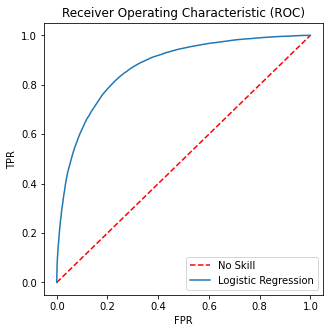

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
number = model_6b.stages[-1].summary.roc.toPandas()
FPR,TPR = number['FPR'],number['TPR']

plt.plot(FPR, TPR, label='Logistic Regression')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

Your explanation here:

The reason why we are using ROC curve to assess our model is because logistic regression is a binary classification model
and ROC curve is a suitable evaluation metric to use in this situation. We utilized this curve to assess how well our model 
predicts the positive/negative sentiment of a tweet. In order to plot a ROC curve, we need to obtain TPR (True Positive Rate)
against FPR (False Positive Rate). The area under the curve (blue line) showcases the regression model's prediction ability. 
The greater the AUC value, the better the model's predicting ability is. 
When AUC is 0.5 (the red line in graph), this means that model has no class separation capacity.

For the FPR value, we can obtain it from (FP/(FP+FN)) and these values can be found in confusion matrix. This means, out of all negative values, 
FPR represent the percentage of predicting the wrong negative value. For the TPR value, we can obtain it from (TP/(TP+FN)). 
Out of all positive values, this metric showcases the percentage of correctly predicting the values as positive.

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives. Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.
For my ROC curve, the curve shows that my logistic regression did a good job at assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average.

# Question 10 (10 pts)
Learn about [precision/recall](https://en.wikipedia.org/wiki/Precision_and_recall) curves. Using the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve.  Note that the precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.  If you understand how a ROC curve is built, you understand how a precision / recall curve is built.  Compare and contrast the differences between precision / recall and ROC curves.  What axis is common and what axis is different between the 2 curves?

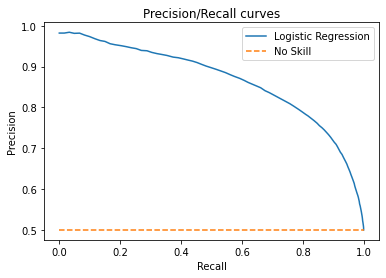

In [33]:
# your code here
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# plt.figure(figsize=(5,5))
# plt.plot([0, 1], [0, 1], 'r--')
number = model_6b.stages[-1].summary.pr.toPandas()
number.head()
recall,precision = number['recall'],number['precision']

plt.plot(recall, precision, label='Logistic Regression')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')
plt.title('Precision/Recall curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Your explanation here:

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds and it
is another evaluation metric we used to assess the performance of the binary classification models. 
Precision is the ratio of the true positive divided by the sum of true positive and false negative values. 
Precision shows how good a model predict positive class. Recall is also called sensitivity. 
It is the ratio of the true positives divided by the sum of true positives and false negatives.

We more often observe precision-recall curve than ROC curve when there is an inbalanced dataset being used as input data. 
While the baseline is fixed with ROC, the baseline of [precision-recall curve] is determined by the ratio 
of positives and negatives as y = P / (P + N).

To answer the question from question 10, 
the recall axis (x-axis) from precision/recall curve is the same as the TPR axis (y-axis) from the ROC curve.

However, the FPR axis is different from the precision axis because precision axis focus on the model's ability to 
correctly predict positive cases.

TPR = TP/(TP+FN)
FPR = FP/(FP+FN)
precision = TP/ (TP + FP)
recall = TP/(TP + FN)